In [1]:
# Import Required Libraries
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\TUSHAR CHOUDHARY\Downloads\train.csv")

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.shape

(1460, 81)

In [10]:
# Convert categorical columns to numerical
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable

In [17]:
#missing values detection in array
np.isnan(X).sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleType_WD                0
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
Length: 245, dtype: int64

In [18]:
#missing values detection in array
np.isnan(y).sum()

0

In [20]:
# fixing the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
X = imputer.fit_transform(X)  # to transform all the changes in x.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.30, random_state = 0)  # .30 means 30% data will be taken as testing and remaning 70% will be taken for training the model.

In [23]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [24]:
pred = regr.predict(X_test)

In [25]:
pred

array([ 2.59927798e-02,  3.41933634e-02, -2.38978627e-02, -2.79982764e-03,
       -1.91471912e-02, -3.10991434e-02,  4.29617587e-02, -5.22610530e-03,
        1.76043156e-02,  1.71005281e-03,  9.88766740e-01,  3.17715774e-02,
       -1.02635681e-02, -2.01370883e-02, -2.57144772e-02, -7.62931202e-04,
       -3.15026306e-03,  8.39894892e-03,  1.46055561e-02,  2.78866590e-02,
       -1.37241902e-02,  2.30349816e-01, -1.20947832e-01,  2.52337205e-03,
        5.39597108e-04, -6.01419723e-04, -1.75106294e-02, -2.60431631e-03,
       -1.13679351e-02, -7.23268471e-03,  3.14955387e-03, -1.04523590e-02,
       -2.05671515e-03,  2.70806847e-02,  1.00217263e+00, -2.26928745e-02,
        6.31319446e-03, -3.17236398e-03,  1.55498075e-03, -6.16877718e-04,
       -1.47395557e-02, -5.81618938e-02,  9.86994820e-01,  2.38805345e-03,
        4.72254198e-03, -3.85571056e-02,  4.76183980e-04, -4.44296744e-02,
       -1.12753447e-02,  4.50616728e-03,  2.11069208e-03, -7.89264509e-03,
       -2.47082611e-02,  

In [26]:
#calculate R squared
from sklearn.metrics import mean_squared_error
r2_score = regr.score(X,y)
print(r2_score)

0.9758584544965914


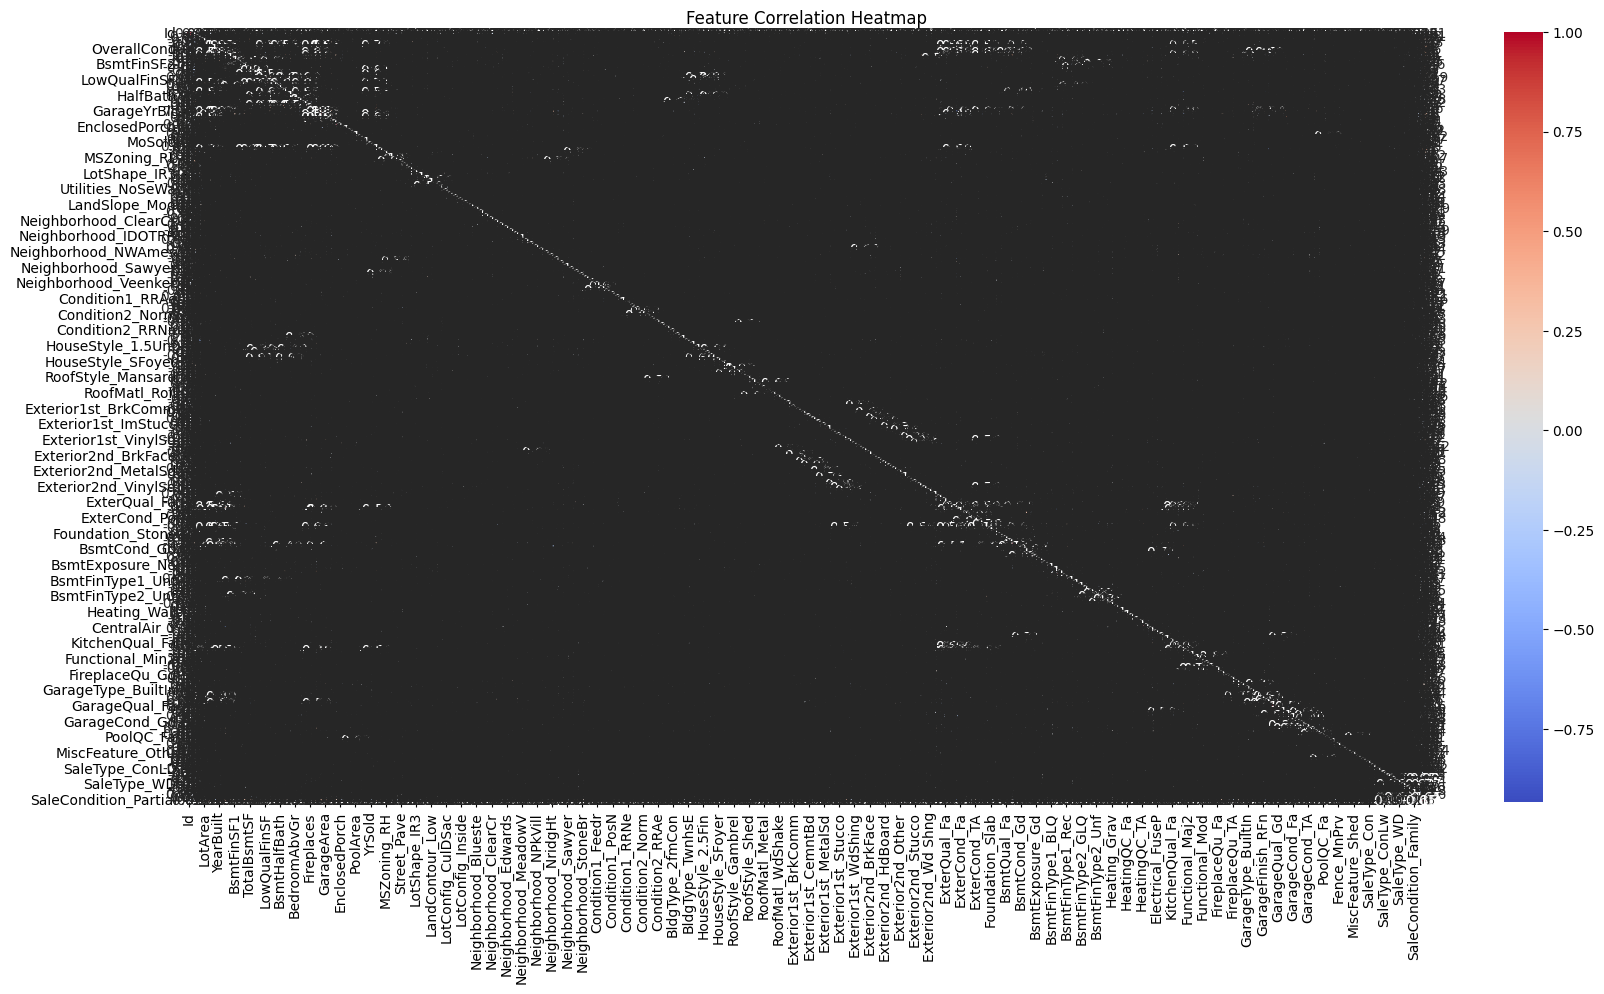

In [36]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

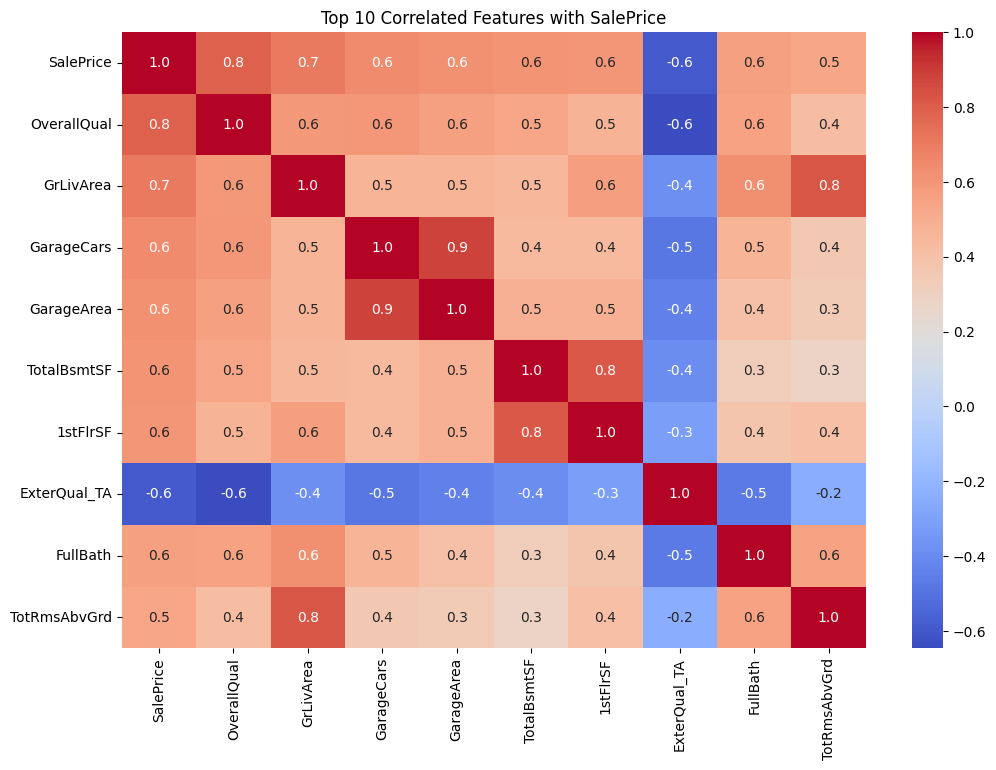

In [51]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Select the top 10 features most correlated with 'SalePrice'
top_10_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10).index # abs is used to include both positive and negative correlations.

# Create a heatmap using only those top 10 features
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_10_features].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Top 10 Correlated Features with SalePrice')
plt.show()

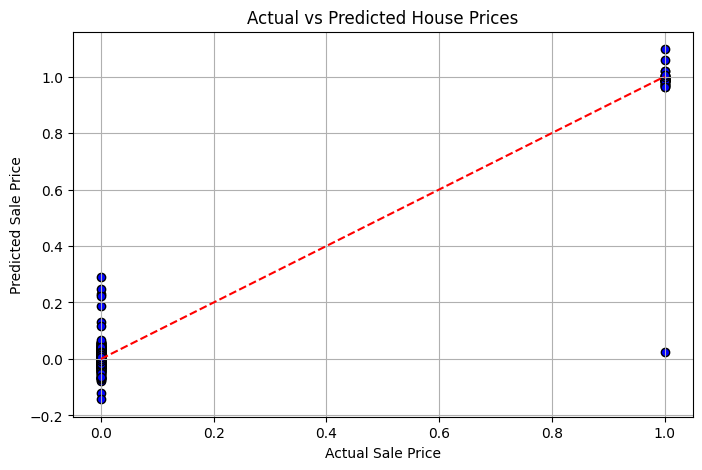

In [42]:
# Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, pred, color='blue', edgecolors='k')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [43]:
# Note:-  The red dashed line shows perfect prediction.

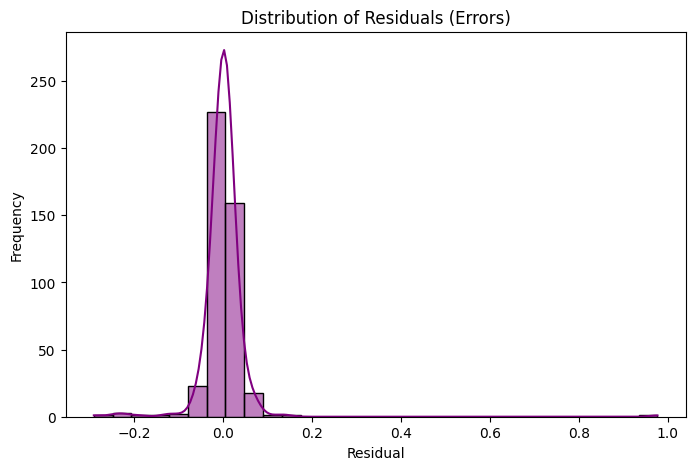

In [46]:
# Residual Plot (Error Distribution)
residuals = y_test - pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [47]:
# Note: -A centered, bell-shaped curve suggests good model behavior.